In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

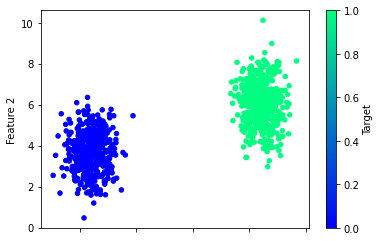

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.6961 - accuracy: 0.4693
Epoch 2/100
750/750 [==============================] - 0s 71us/sample - loss: 0.6939 - accuracy: 0.4893
Epoch 3/100
750/750 [==============================] - 0s 69us/sample - loss: 0.6920 - accuracy: 0.5293
Epoch 4/100
750/750 [==============================] - 0s 69us/sample - loss: 0.6899 - accuracy: 0.5813
Epoch 5/100
750/750 [==============================] - 0s 79us/sample - loss: 0.6872 - accuracy: 0.6560
Epoch 6/100
750/750 [==============================] - 0s 72us/sample - loss: 0.6829 - accuracy: 0.7173
Epoch 7/100
750/750 [==============================] - 0s 70us/sample - loss: 0.6763 - accuracy: 0.7907
Epoch 8/100
750/750 [==============================] - 0s 69us/sample - loss: 0.6665 - accuracy: 0.8387
Epoch 9/100
750/750 [==============================] - 0s 69us/sample - loss: 0.6537 - accuracy: 0.8880
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 65us/sample - loss: 0.1109 - accuracy: 1.0000
Epoch 79/100
750/750 [==============================] - 0s 79us/sample - loss: 0.1090 - accuracy: 1.0000
Epoch 80/100
750/750 [==============================] - 0s 66us/sample - loss: 0.1071 - accuracy: 1.0000
Epoch 81/100
750/750 [==============================] - 0s 64us/sample - loss: 0.1053 - accuracy: 1.0000
Epoch 82/100
750/750 [==============================] - 0s 64us/sample - loss: 0.1035 - accuracy: 1.0000
Epoch 83/100
750/750 [==============================] - 0s 65us/sample - loss: 0.1018 - accuracy: 1.0000
Epoch 84/100
750/750 [==============================] - 0s 67us/sample - loss: 0.1001 - accuracy: 1.0000
Epoch 85/100
750/750 [==============================] - 0s 65us/sample - loss: 0.0985 - accuracy: 1.0000
Epoch 86/100
750/750 [==============================] - 0s 65us/sample - loss: 0.0969 - accuracy: 1.0000
Epoch 87/100
750/750 [==============================] - 0s 62us/samp

<AxesSubplot:>

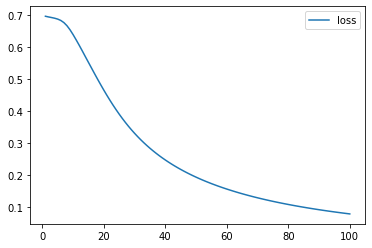

In [11]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

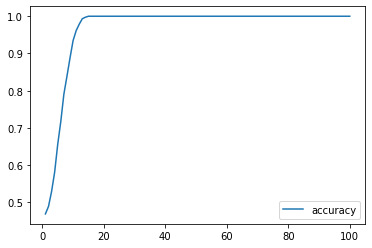

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

250/1 - 0s - loss: 0.0691 - accuracy: 1.0000
Loss: 0.07933218544721603, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
nn_model.predict_classes(new_X_scaled)

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

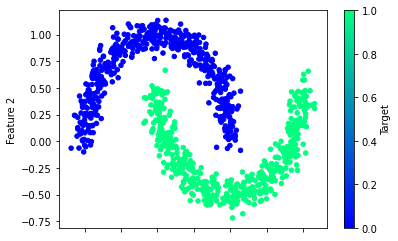

In [15]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [16]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [17]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 0s 125us/sample - loss: 0.8515 - accuracy: 0.5640
Epoch 2/100
750/750 [==============================] - 0s 73us/sample - loss: 0.7609 - accuracy: 0.5893
Epoch 3/100
750/750 [==============================] - 0s 78us/sample - loss: 0.6961 - accuracy: 0.6000
Epoch 4/100
750/750 [==============================] - 0s 77us/sample - loss: 0.6505 - accuracy: 0.6147
Epoch 5/100
750/750 [==============================] - 0s 72us/sample - loss: 0.6164 - accuracy: 0.6213
Epoch 6/100
750/750 [==============================] - 0s 72us/sample - loss: 0.5885 - accuracy: 0.6453
Epoch 7/100
750/750 [==============================] - 0s 75us/sample - loss: 0.5656 - accuracy: 0.6587
Epoch 8/100
750/750 [==============================] - 0s 74us/sample - loss: 0.5458 - accuracy: 0.6627
Epoch 9/100
750/750 [==============================] - 0s 79us/sample - loss: 0.5289 - accuracy: 0.6733
Epoch 10/100
750/750 [====================

750/750 [==============================] - 0s 64us/sample - loss: 0.2675 - accuracy: 0.8880
Epoch 79/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2670 - accuracy: 0.8867
Epoch 80/100
750/750 [==============================] - 0s 63us/sample - loss: 0.2665 - accuracy: 0.8867
Epoch 81/100
750/750 [==============================] - 0s 64us/sample - loss: 0.2659 - accuracy: 0.8867
Epoch 82/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2655 - accuracy: 0.8853
Epoch 83/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2650 - accuracy: 0.8853
Epoch 84/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2646 - accuracy: 0.8853
Epoch 85/100
750/750 [==============================] - 0s 65us/sample - loss: 0.2641 - accuracy: 0.8853
Epoch 86/100
750/750 [==============================] - 0s 64us/sample - loss: 0.2637 - accuracy: 0.8853
Epoch 87/100
750/750 [==============================] - 0s 66us/samp

<AxesSubplot:>

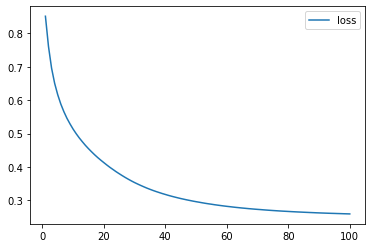

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

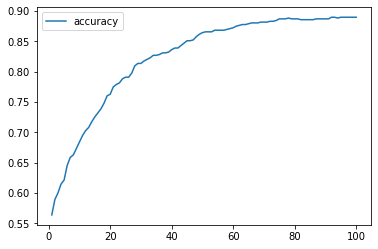

In [19]:
# Plot the loss
history_df.plot(y="accuracy")

In [20]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [21]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [22]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Train on 750 samples
Epoch 1/100
750/750 [==============================] - 1s 1ms/sample - loss: 0.7179 - accuracy: 0.5400
Epoch 2/100
750/750 [==============================] - 0s 74us/sample - loss: 0.6591 - accuracy: 0.6107
Epoch 3/100
750/750 [==============================] - 0s 72us/sample - loss: 0.6094 - accuracy: 0.6760
Epoch 4/100
750/750 [==============================] - 0s 72us/sample - loss: 0.5667 - accuracy: 0.6920
Epoch 5/100
750/750 [==============================] - 0s 85us/sample - loss: 0.5303 - accuracy: 0.7360
Epoch 6/100
750/750 [==============================] - 0s 70us/sample - loss: 0.4988 - accuracy: 0.7987
Epoch 7/100
750/750 [==============================] - 0s 72us/sample - loss: 0.4716 - accuracy: 0.8373
Epoch 8/100
750/750 [==============================] - 0s 72us/sample - loss: 0.4485 - accuracy: 0.8493
Epoch 9/100
750/750 [==============================] - 0s 81us/sample - loss: 0.4279 - accuracy: 0.8507
Epoch 10/100
750/750 [======================

750/750 [==============================] - 0s 66us/sample - loss: 0.2321 - accuracy: 0.8933
Epoch 79/100
750/750 [==============================] - 0s 69us/sample - loss: 0.2317 - accuracy: 0.8933
Epoch 80/100
750/750 [==============================] - 0s 64us/sample - loss: 0.2314 - accuracy: 0.8947
Epoch 81/100
750/750 [==============================] - 0s 62us/sample - loss: 0.2311 - accuracy: 0.8947
Epoch 82/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2308 - accuracy: 0.8947
Epoch 83/100
750/750 [==============================] - 0s 67us/sample - loss: 0.2305 - accuracy: 0.8947
Epoch 84/100
750/750 [==============================] - 0s 68us/sample - loss: 0.2302 - accuracy: 0.8947
Epoch 85/100
750/750 [==============================] - 0s 67us/sample - loss: 0.2299 - accuracy: 0.8947
Epoch 86/100
750/750 [==============================] - 0s 66us/sample - loss: 0.2296 - accuracy: 0.8960
Epoch 87/100
750/750 [==============================] - 0s 64us/samp